## Data Preprocessing and Feature Engineering in Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.simplefilter('ignore')


In [2]:
## loading the dataset 
df=pd.read_csv('adult_with_headers.csv')
df.shape

(32561, 15)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1.Handle missing values as per the best practices (imputation, removal, etc.).

In [4]:
# checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df = df.replace('?', np.nan)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# checking for duplicates
df.duplicated().sum()

np.int64(24)

In [7]:
# droping duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Apply scaling techniques to numerical features:
- a.Standard Scaling   b. Min-Max Scaling

In [10]:
num_col=df.select_dtypes(include=[int,float]).columns
num_col


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [11]:
# applying standard scaler
std_sca=StandardScaler()
std=pd.DataFrame(std_sca.fit_transform(df[num_col]),columns=num_col)
std


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [12]:
# applying minmax scaler
min_max=MinMaxScaler()
minmax=pd.DataFrame(min_max.fit_transform(df[num_col]),columns=num_col)
minmax

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## Discuss the scenarios where each scaling technique is preferred and why

In [13]:
## Standard Scaler:
# when data is roughly normally distributed, and you need to center the data to a mean of 0 and a standard deviation of 1

## Min-Max Scaling:
# Preferred when data needs to be bounded within a specific range (e.g., [0, 1] or [-1, 1]).

## 2. Encoding Techniques:

## Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [14]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [15]:
categorical_col=df.select_dtypes(include='object').columns
categorical_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [16]:
for col in categorical_col:
    data=df[col].unique()
    print(f'{col} had {data}','\n')

workclass had [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education had [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital_status had [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation had [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship had [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race had [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex had [' Male' ' Female'] 

native_country had [

In [17]:
#applying onehot encoder
one_hot=OneHotEncoder()
dummies=pd.get_dummies(df[['sex','income']],dtype=int)
dummies

,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,1,0,1,0
...,...,...,...,...
32532,1,0,1,0
32533,0,1,0,1
32534,1,0,1,0
32535,0,1,1,0


In [18]:
#applying labelencoder
label=LabelEncoder()
df['education'] = label.fit_transform(df['education'])
df['workclass'] = label.fit_transform(df['workclass'])
df['marital_status'] = label.fit_transform(df['marital_status'])
df['occupation'] = label.fit_transform(df['occupation'])
df['relationship'] = label.fit_transform(df['relationship'])
df['race'] = label.fit_transform(df['race'])
df['native_country'] = label.fit_transform(df['native_country'])

In [19]:
df.drop(df[['sex','income']],axis=1,inplace=True)

In [20]:
df=df.join(dummies,how='right')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32533,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32534,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32535,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int64
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int64
 4   education_num   32537 non-null  int64
 5   marital_status  32537 non-null  int64
 6   occupation      32537 non-null  int64
 7   relationship    32537 non-null  int64
 8   race            32537 non-null  int64
 9   capital_gain    32537 non-null  int64
 10  capital_loss    32537 non-null  int64
 11  hours_per_week  32537 non-null  int64
 12  native_country  32537 non-null  int64
 13  sex_ Female     32537 non-null  int64
 14  sex_ Male       32537 non-null  int64
 15  income_ <=50K   32537 non-null  int64
 16  income_ >50K    32537 non-null  int64
dtypes: int64(17)
memory usage: 4.2 MB


## Discuss the pros and cons of One-Hot Encoding and Label Encoding

In [22]:
## One-Hot Encoder

# Pros

# Best for nominal categories (e.g., Petrol/Diesel/CNG).
# to convert categorical column into numerical column
# Works well for linear models, logistic regression, tree models, SVMs, etc.

#Cons

# Bad for datasets with many unique categories
# Training becomes slower with too many dummy variables.

In [23]:
## Label Encoder

#Pros

# assigns each category a number like 0, 1, 2…
# Useful when categories have natural order (Low < Medium < High,eg:education level,employe position in company).
# Does not increase number of columns → memory efficient.

#Cons

# Creates a false sense of order for nominal data(based on alphabet order).
# Not suitable for categorical variables with no ranking.
# Can mislead linear models, logistic regression, KNN, etc.


## 3. Feature Engineering:

## Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [24]:
df['Age_Group'] = pd.cut(
    df['age'],
    bins=[0, 25, 45, 65, 120],
    labels=['Young', 'Adult', 'Mid_Age', 'Senior']
)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Age_Group
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0,Adult
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0,Mid_Age
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0,Adult
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0,Mid_Age
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0,Adult
32533,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1,Adult
32534,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0,Mid_Age
32535,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0,Young


In [25]:
df['Work_Hours_Category'] = pd.cut(
    df['hours_per_week'],
    bins=[0, 20, 40, 60, 100],
    labels=['Part_Time', 'Full_Time', 'Over_Time', 'Extreme']
)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male', 'income_ <=50K', 'income_ >50K', 'Age_Group',
       'Work_Hours_Category'],
      dtype='object')

## Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

<Axes: >

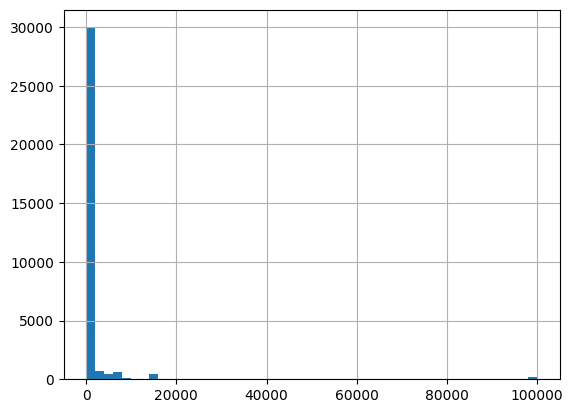

In [26]:

# Effect of Transformation before
df['capital_gain'].hist(bins=50)


In [27]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

<Axes: >

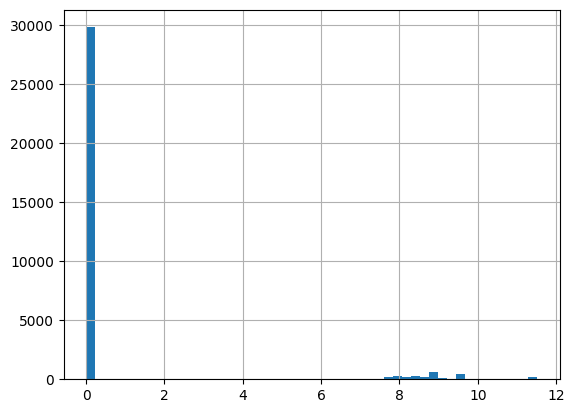

In [28]:
# Effect of Transformation After
df['capital_gain_log'].hist(bins=50)


In [29]:
# The “capital-gain” variable in the dataset is highly right-skewed.
# To reduce this skewness and normalize the distribution,a log transformation was applied using log1p, which safely handles zero values.
# After transformation, the feature becomes more evenly distributed, improving the model’s ability to learn patterns and reducing the effect of outliers.